# Activity 5: Using Numpy and Sympy


To explore this package more, lets work on a disease model example.

The SIR model is a classic model for how an infectious disease moves through a population. It is particularly good at short term modeling of non-deadly diseases that are transmitted through person-to-person contact like Gonorhea or Common Colds. It does not capture seasonal patterns, and it needs to be modified before it can inform diseases that are more likely to have deadly outcomes.

The idea is to model the population of $S(t)$ people sucsetible to infection, $I(t)$ infected, and $R(t)$ recovered from infection by tracking the rate at which these populations change in a small amount of time.

- Susceptible people could become infected if they encounter an infected person.
- Infected people recover from the infection at a given rate.
- Recovered people are immune from reinfection.

The only trick we need is to note that the likliehod that susceptible people meet infected people is proportional to the product of the size of the two populations. I.e. the more of either group there are, the more likely a new infection is.

This gives us the system of differential equations:

$$ \frac{dS}{dt} = - r S I $$
$$ \frac{dI}{dt} = r SI - a I $$
$$ \frac{dR}{dt} = a I $$

and r is the rate of infection; and a is the rate of recovery. 

## STEP 1: 

Let's explore this using Numpy. Firstly we need to write a function that f(t, y) that takes t and a numpy array y giving the S, I, and R values and which returns the three values for the derivatives of those variables above.

One annoying thing is that in order for this to work you have to set the values of r and a ahead of time they can't be parameters in the function def. So do that as well. I've started the cell but you will need to finish it.

In [17]:
def f(t, y, r, a):
    # y[0] is S
    # y[1] is I
    # y[2] is R
    
    dy = [0, 0, 0]
    # dy[0] is dS/dt; dy[1] is dI/dt; and dy[2] is dR/dt.
    
    dy[0] = - r * y[0] * y[1]
    dy[1] = r * y[0] * y[1] - a * y[1]
    dy[2] = a * y[1]
    
    return dy

## Step 2:

Now let's use scipy.integrate.odeint to take an initial value for the S, I, and R populations and see where it ends up after t units of time.

Note that the t value you pass odeint must be a list with the first element 0.0 (our starting t) and then our final t.

Note we need tfirst = True set; and then we can use args = (2, 0.1) to pass values for r and a.


Try different values for the starting point, r and a and see what changes. Note it is helpful to keep the intitial values so that the sum of them is 1.

In [20]:
from scipy.integrate import odeint

# set out initial condition
y0 = [0.9, 0.1, 0.0]
r = 2
a = 0.1

odeint(f, y0, [0.0, 20.0], tfirst = True, args = (r, a) )

array([[9.00000000e-01, 1.00000000e-01, 0.00000000e+00],
       [3.99489526e-08, 1.53416211e-01, 8.46583749e-01]])

## Step 3:

So the real way odeint works is that we pass a whole list of numbers of t (using numpy.arange) and then we get back a list of numbers for the y values, which we can then use in making plots.

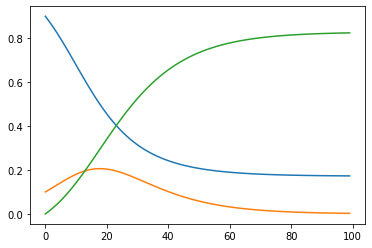

In [25]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0, 100, 1)
y0 = [0.9, 0.1, 0.0]
r = 0.2
a = 0.1

y = odeint(f, y0, t, tfirst = True, args = (r, a) )

plt.plot(t, y)

Again try some different values for the initial values, the r, the a, and also the bounds on t and see what you can learn.

